In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
fake = pd.read_csv(r"C:\Users\ssp1_\OneDrive\Desktop\DESKTOP\destop\tution\Fake.csv")
true = pd.read_csv(r"C:\Users\ssp1_\OneDrive\Desktop\DESKTOP\destop\tution\True.csv")

In [3]:
fake['target'] = 'fake'
true['target'] = 'true'

In [4]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [5]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [6]:
data.drop(["date"],axis=1,inplace=True)

In [7]:
data.drop(["title"],axis=1,inplace=True)

In [8]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [9]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from stop_words import get_stop_words
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


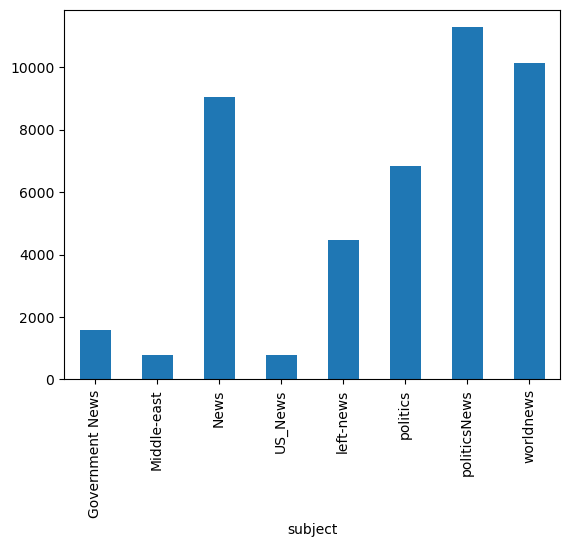

In [11]:
import matplotlib.pyplot as plt
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


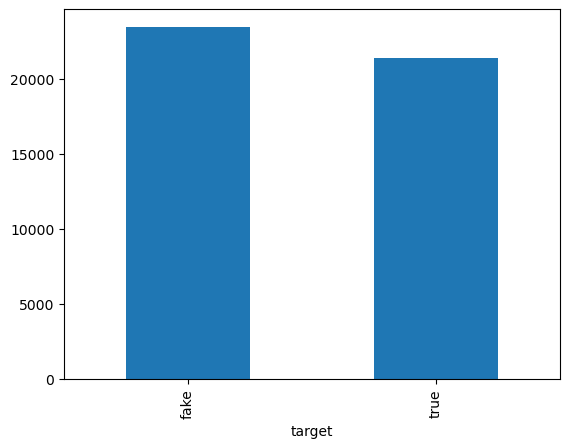

In [12]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

In [15]:
pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 545.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


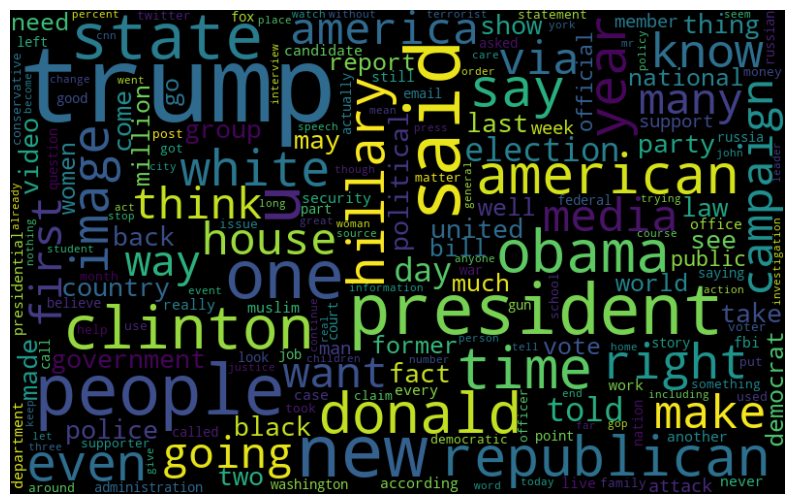

In [16]:
from wordcloud import WordCloud
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

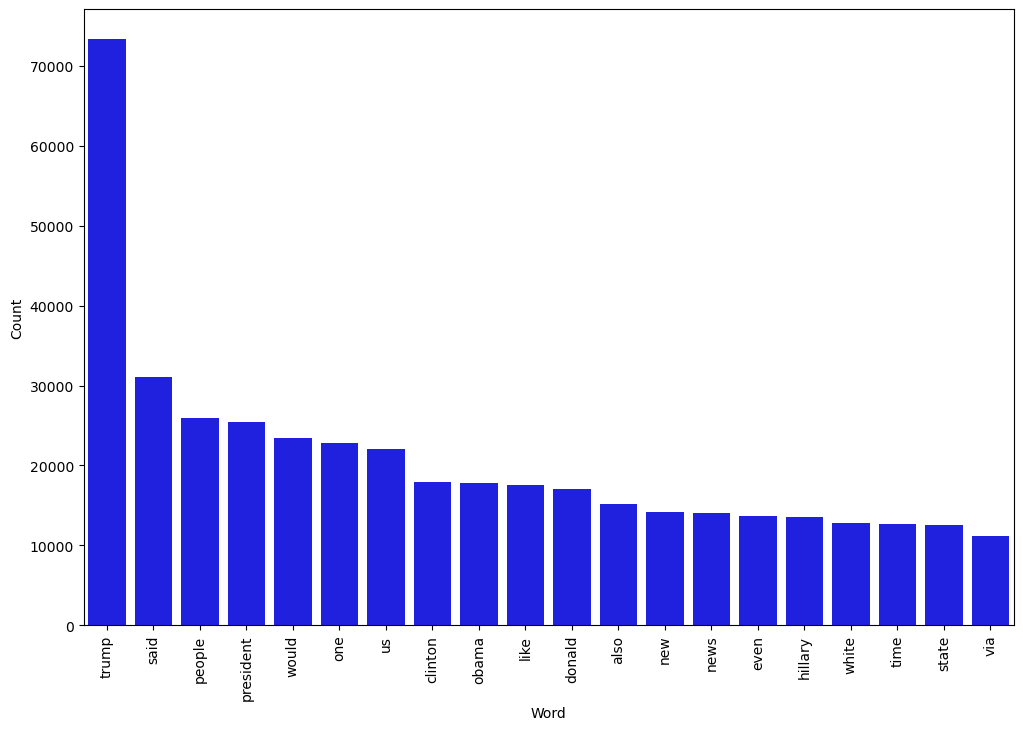

In [18]:
import seaborn as sns
counter(data[data['target'] == 'fake'], 'text', 20)

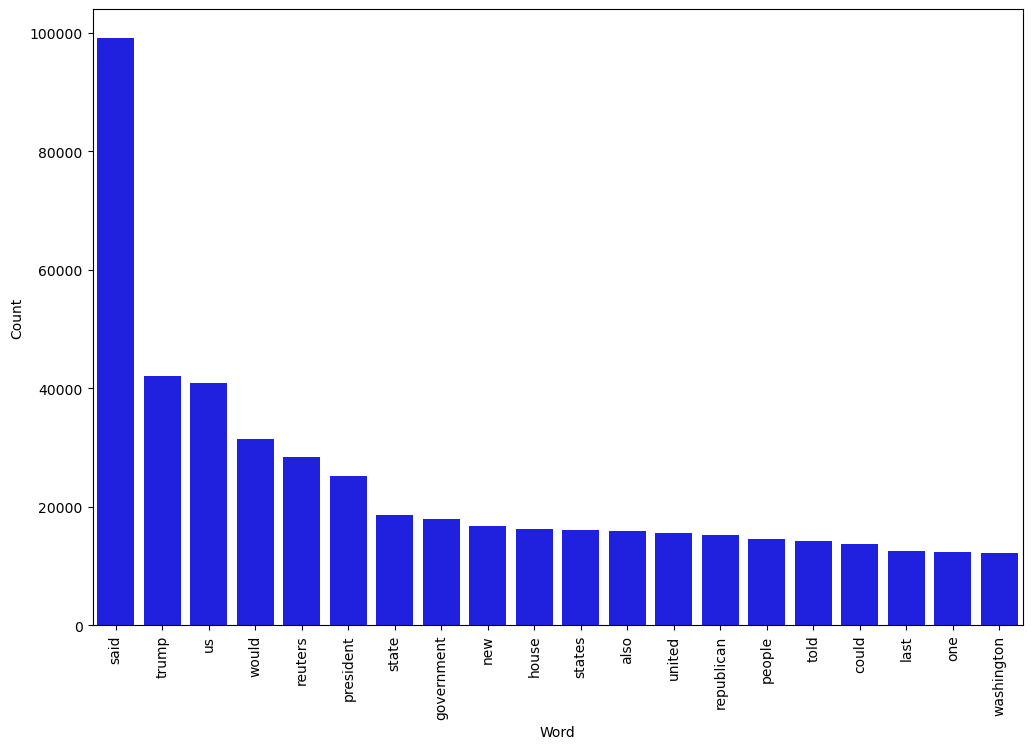

In [19]:
counter(data[data['target'] == 'true'], 'text', 20)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [26]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.99%


In [22]:
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.62%


In [28]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.04%
